In this notebook we inspect the predictions with respect to the observed IMT values by using scatter plots

In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns
from os.path import join as opj
from sklearn.metrics import r2_score, mean_absolute_error

In [2]:
contrast_cases=["lookNeg_lookNeut", "RegNeg_lookNeg"]
target_cases = ["average_progression", "max_progression"] 

Show the Yeo-johnson transformations that we performed on the target variables, always inside the cross-validation to avoid any data lekeage

(array([ 2.,  1.,  8., 16., 34., 43., 24.,  9.,  6.,  2.]),
 array([-3.26722413, -2.64608076, -2.02493739, -1.40379402, -0.78265066,
        -0.16150729,  0.45963608,  1.08077945,  1.70192282,  2.32306618,
         2.94420955]),
 <BarContainer object of 10 artists>)

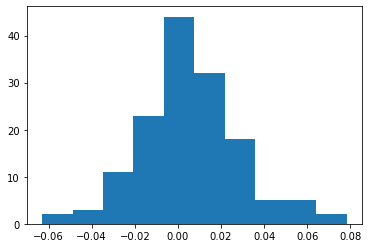

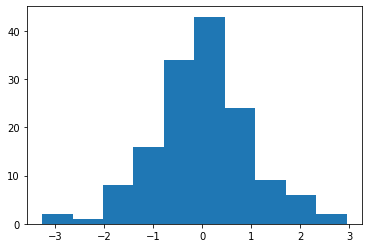

In [9]:
from sklearn.preprocessing import PowerTransformer
plt.figure()
plt.hist(np.load("../data/data_to_analyse.npz")['y_avg'])
plt.figure()
plt.hist(PowerTransformer(method='yeo-johnson').fit_transform(np.load("../data/data_to_analyse.npz")['y_avg'][:, None]).flatten())

(array([ 1.,  0.,  3., 10., 23., 46., 32., 13., 10.,  7.]),
 array([-3.61470201, -3.00083187, -2.38696173, -1.7730916 , -1.15922146,
        -0.54535132,  0.06851882,  0.68238895,  1.29625909,  1.91012923,
         2.52399936]),
 <BarContainer object of 10 artists>)

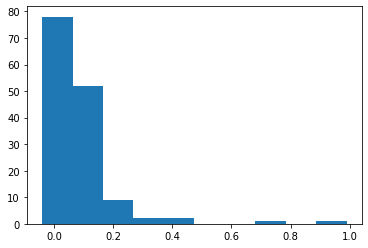

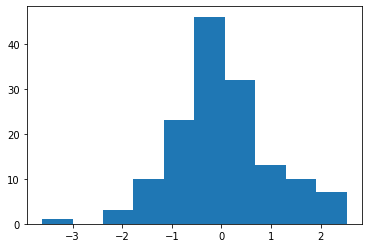

In [10]:
plt.figure()
plt.hist(np.load("../data/data_to_analyse.npz")['y_max'])
plt.figure()
plt.hist(PowerTransformer(method='yeo-johnson').fit_transform(np.load("../data/data_to_analyse.npz")['y_max'][:, None]).flatten())

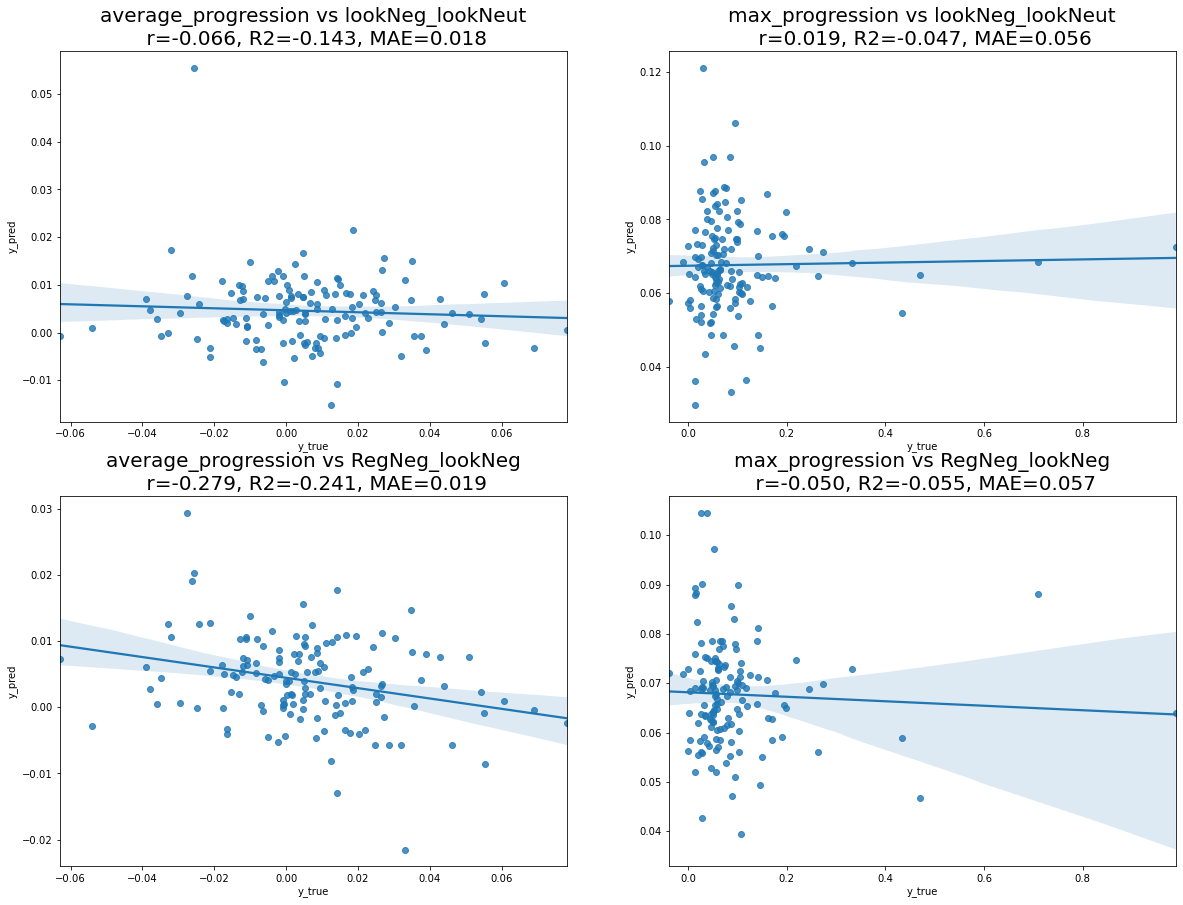

In [3]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 15))
axs = axs.flatten()
ii=0
for contrast_case in contrast_cases:
    for target_case in target_cases:
        y_results_df = pd.read_csv(opj("../results/prediction/", target_case, contrast_case, "y_results.csv"))
        
        y_pred = y_results_df.y_pred.to_numpy()
        y_true = y_results_df.y_true.to_numpy()
        
        r = np.corrcoef(y_true, y_pred)[0,1]
        r2 = r2_score(y_true, y_pred)
        mae = mean_absolute_error(y_true, y_pred)
        
        sns.regplot(x="y_true", y="y_pred", data=y_results_df, ax=axs[ii])
        axs[ii].set_title(target_case + " vs " + contrast_case +\
                          "\n" + " r=%.3f, R2=%.3f, MAE=%.3f" % (r, r2, mae), size=20)
        
        ii+=1